<a href="https://colab.research.google.com/github/John-G-Thomas/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/Copy_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

#**^ EXAMPLE ^**

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-06-04 23:52:18--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.5MB/s    in 13s     

2020-06-04 23:52:32 (14.9 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
import pandas as pd

In [0]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()


(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()


(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()


(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()


(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


#Which dataframes have the columns youn need?
#Which columns do you need?
**>products.csv**

>> product_id

>>product_name

**>orders.csv**

>>order_id

>>order_number

>>order_dow

>>order_hour_of_day

**>products.csv**

>>product_id

>>product_name

**>order_product__prior.csv**

>>order_id

>>product_id

>>add_to_cart_order

**>order_product__train.csv**

>>order_id

>>product_id

>>add_to_cart_order



#Now, It is time to merge datasets. 

In [0]:
order_products__prior_subset = order_products__prior[['order_id', 'product_id']]
order_products__train_subset = order_products__train[['order_id', 'product_id']]
products_subset = products[['product_id', 'product_name']]

In [0]:
order_products__train_subset


,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633
...,...,...
1384612,3421063,14233
1384613,3421063,35548
1384614,3421070,35951
1384615,3421070,16953


In [0]:
order_products__prior_subset


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
32434484,3421083,39678
32434485,3421083,11352
32434486,3421083,4600
32434487,3421083,24852


In [0]:
products_subset.head()

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce


In [0]:
order_products_subset = pd.concat([order_products__prior_subset, order_products__train_subset])

print(order_products_subset.shape)
order_products_subset.head()


(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [0]:
orders_subset_and_products_subset = pd.merge(products_subset, order_products_subset, on='product_id', how='inner')

orders_subset_and_products_subset.head()

,product_id,product_name,order_id
0,1,Chocolate Sandwich Cookies,1107
1,1,Chocolate Sandwich Cookies,5319
2,1,Chocolate Sandwich Cookies,7540
3,1,Chocolate Sandwich Cookies,9228
4,1,Chocolate Sandwich Cookies,9273


In [0]:
orders_subset_and_products_subset.tail()

,product_id,product_name,order_id
33819101,49688,Fresh Foaming Cleanser,3401313
33819102,49688,Fresh Foaming Cleanser,655800
33819103,49688,Fresh Foaming Cleanser,2198380
33819104,49688,Fresh Foaming Cleanser,2508423
33819105,49688,Fresh Foaming Cleanser,2986153


In [0]:
#reorder column headers
final_order_and_product = orders_subset_and_products_subset[['product_name', 'product_id', 'order_id']]

final_order_and_product.head()

,product_name,product_id,order_id
0,Chocolate Sandwich Cookies,1,1107
1,Chocolate Sandwich Cookies,1,5319
2,Chocolate Sandwich Cookies,1,7540
3,Chocolate Sandwich Cookies,1,9228
4,Chocolate Sandwich Cookies,1,9273


In [0]:
# remove underscores from column headers
final_order_and_product.columns = [column.replace('_', " ") for column in final_order_and_product]

final_order_and_product.head()

,product name,product id,order id
0,Chocolate Sandwich Cookies,1,1107
1,Chocolate Sandwich Cookies,1,5319
2,Chocolate Sandwich Cookies,1,7540
3,Chocolate Sandwich Cookies,1,9228
4,Chocolate Sandwich Cookies,1,9273


In [0]:
final_order_and_product.tail()

,product name,product id,order id
33819101,Fresh Foaming Cleanser,49688,3401313
33819102,Fresh Foaming Cleanser,49688,655800
33819103,Fresh Foaming Cleanser,49688,2198380
33819104,Fresh Foaming Cleanser,49688,2508423
33819105,Fresh Foaming Cleanser,49688,2986153


In [0]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

subset = merged[condition]

print(subset.shape)
subset.head()

NameError: ignored

#Lets Try Something

In [0]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Aavocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

In [0]:
final_order_and_product.columns.to_list()

['product name', 'product id', 'order id']

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products_subset[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_number']]))


print(merged.shape)
merged.head()

(33819106, 4)


,product_id,product_name,order_id,order_number
0,1,Chocolate Sandwich Cookies,1107,2
1,769,Sliced American Cheese,1107,2
2,6184,Clementines,1107,2
3,8048,Packaged Grape Tomatoes,1107,2
4,9007,Frosted Flakes,1107,2


In [0]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

condition = merged['product_name'].isin(product_names)

Top10_subset = merged[condition]

print(Top10_subset.shape)
Top10_subset.head(25)

(2418314, 4)


,product_id,product_name,order_id,order_number
7,13176,Bag of Organic Bananas,1107,2
8,16797,Strawberries,1107,2
20,16797,Strawberries,5319,65
47,16797,Strawberries,9273,1
51,21903,Organic Baby Spinach,9273,1
96,16797,Strawberries,13668,10
181,16797,Strawberries,25365,3
214,16797,Strawberries,33675,28
255,13176,Bag of Organic Bananas,43669,20
322,16797,Strawberries,54412,23


In [0]:
Top10_subset['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

In [0]:
# Wide Format

In [0]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
# table2 -> tidy

In [0]:
# Take the row index, and add it as a new column
table2 = table1.reset_index()


In [0]:
table2

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
  tidy = table2.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

In [0]:
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
#Rename the two columns.
tidy1 = tidy.rename(columns={'variable': 'Name', 'value': 'Result', 'index': 'trt'})

In [0]:
tidy1

,trt,Name,Result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,trt,Name,Result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
# reorder columns
final_tidy2 = tidy1[['Name', 'trt', 'Result']]


final_tidy2

,Name,trt,Result
0,treatmenta,John Smith,NaN
1,treatmenta,Jane Doe,16.0
2,treatmenta,Mary Johnson,3.0
3,treatmentb,John Smith,2.0
4,treatmentb,Jane Doe,11.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# tidy -> table2

In [0]:
wide = final_tidy2.pivot_table(index='Name', columns='trt', values='Result')

wide

trt,Jane Doe,John Smith,Mary Johnson
Name,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
# 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
# Pivot/ widen flight data by months

In [0]:
widen = flights.pivot_table(index='year', columns='month', values='passengers')

In [0]:
widen

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [0]:
wid = flights.pivot_table(index='month', columns='year', values='passengers')

In [0]:
wid

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [0]:
# Flights Pivot Table


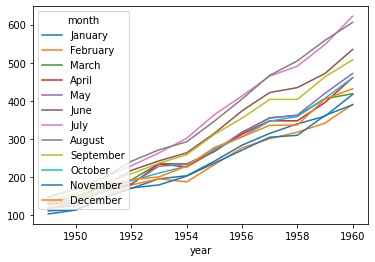

In [0]:
flights.pivot_table(index='year', columns='month', values='passengers').plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####